Analysis of Human Fetal Retina from Zuo et al. 2023

In [1]:
#imports
import numpy as np
import pandas as pd
import plotnine as pn
import anndata as ad
import scanpy as sc
import scFates as scf
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

c:\Users\james\mambaforge\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read_h5ad("F:/Lab/human retina/Fetal Human Retina.h5ad")

In [6]:
adata = sc.read_h5ad("F:/Lab/human retina/Fetal Human Retina_integrated.h5ad")

In [3]:
adata.obs['development_stage']

Multi_Fetal_11w2d_FR_2_TACCAAATCTGGCTTC-1    12th week post-fertilization human stage
Multi_Fetal_11w2d_FR_TGACCTTGTTACAAAC-1      12th week post-fertilization human stage
sn_multiome_d76c_GATAAAGGTACGGTAC-1          11th week post-fertilization human stage
sn_multiome_d76p_AGCTAAACATTGTGCA-1          11th week post-fertilization human stage
Multi_Fetal_11w2d_FR_AGTGGACAGTTTGGTA-1      12th week post-fertilization human stage
                                                               ...                   
Multi_Fetal_13W_FR_TTTGTGGCACCTACGG-1        14th week post-fertilization human stage
Multi_Fetal_13W_FR_GGAACCACACAGGAAT-1        14th week post-fertilization human stage
Multi_Fetal_11w2d_FR_GGTTGCGGTTGCACAA-1      12th week post-fertilization human stage
Multi_Fetal_11w2d_FR_2_CTTGAACAGCAAGATG-1    12th week post-fertilization human stage
Multiome_12w3d_NR_CTATTACTCAAGCTTA-1         13th week post-fertilization human stage
Name: development_stage, Length: 41984, dtype: categor

In [5]:
adata_rgc = adata[adata.obs['majorclass'] == 'RGC']

In [6]:
adata = adata_rgc

In [8]:
adata.var['feature_name']=adata.var['feature_name'].astype("str")
lst = adata.var['feature_name'].tolist()
cap_lst = [s.capitalize() for s in lst]
adata.var['feature_name'] = cap_lst
adata.var.index = cap_lst

C:\Users\james\AppData\Local\Temp\ipykernel_7696\1910871256.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


In [9]:
adata.var_names

Index(['Ensg00000272438.1', 'Ensg00000230699.2', 'Linc02593', 'Samd11',
       'Klhl17', 'Hes4', 'Isg15', 'Agrn', 'C1orf159', 'Sdf4',
       ...
       'Mt-co2', 'Mt-atp8', 'Mt-atp6', 'Mt-co3', 'Mt-nd3', 'Mt-nd4l', 'Mt-nd4',
       'Mt-nd5', 'Mt-nd6', 'Mt-cyb'],
      dtype='object', length=5672)

In [10]:
adata

AnnData object with n_obs × n_vars = 41984 × 5672
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'subclass', 'majorclass', 'study_name', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'leiden'
    var: 'feature_is_filtered', 'feature_name', 'feature_referenc

In [11]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,highly_variable,means,dispersions,dispersions_norm
Ensg00000272438.1,False,Ensg00000272438.1,NCBITaxon:9606,gene,351,True,0.025534,0.005158,0.319615
Ensg00000230699.2,False,Ensg00000230699.2,NCBITaxon:9606,gene,3043,True,0.016376,-0.019696,0.267323
Linc02593,False,Linc02593,NCBITaxon:9606,gene,4152,True,0.014956,0.100432,0.520068
Samd11,False,Samd11,NCBITaxon:9606,gene,4172,True,0.131380,0.567427,1.502611
Klhl17,False,Klhl17,NCBITaxon:9606,gene,3402,True,0.016604,0.080643,0.478433
...,...,...,...,...,...,...,...,...,...
Mt-nd4l,False,Mt-nd4l,NCBITaxon:9606,gene,297,True,0.205320,0.427526,1.208263
Mt-nd4,False,Mt-nd4,NCBITaxon:9606,gene,1378,True,1.351321,1.489632,1.578022
Mt-nd5,False,Mt-nd5,NCBITaxon:9606,gene,1812,True,0.477475,0.600418,1.780256
Mt-nd6,False,Mt-nd6,NCBITaxon:9606,gene,525,True,0.049352,0.012544,0.335156


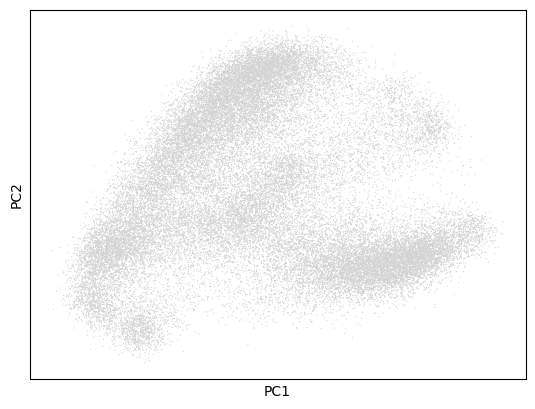

In [12]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

In [13]:
#Compute the neighborhood graph to begin clustering
#sc.pp.neighbors(adata, n_neighbors=5, n_pcs=40)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [14]:
#Cluster cells via leiden
#sc.tl.leiden(adata, resolution=0.95)
sc.tl.leiden(adata, resolution=0.3)

C:\Users\james\AppData\Local\Temp\ipykernel_7696\2242152084.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


In [15]:
sc.tl.paga(adata)
sc.pl.paga(adata,plot=False)

In [16]:
#plot umap based on clustering/neighborhood graph from above
sc.tl.umap(adata, init_pos='paga')

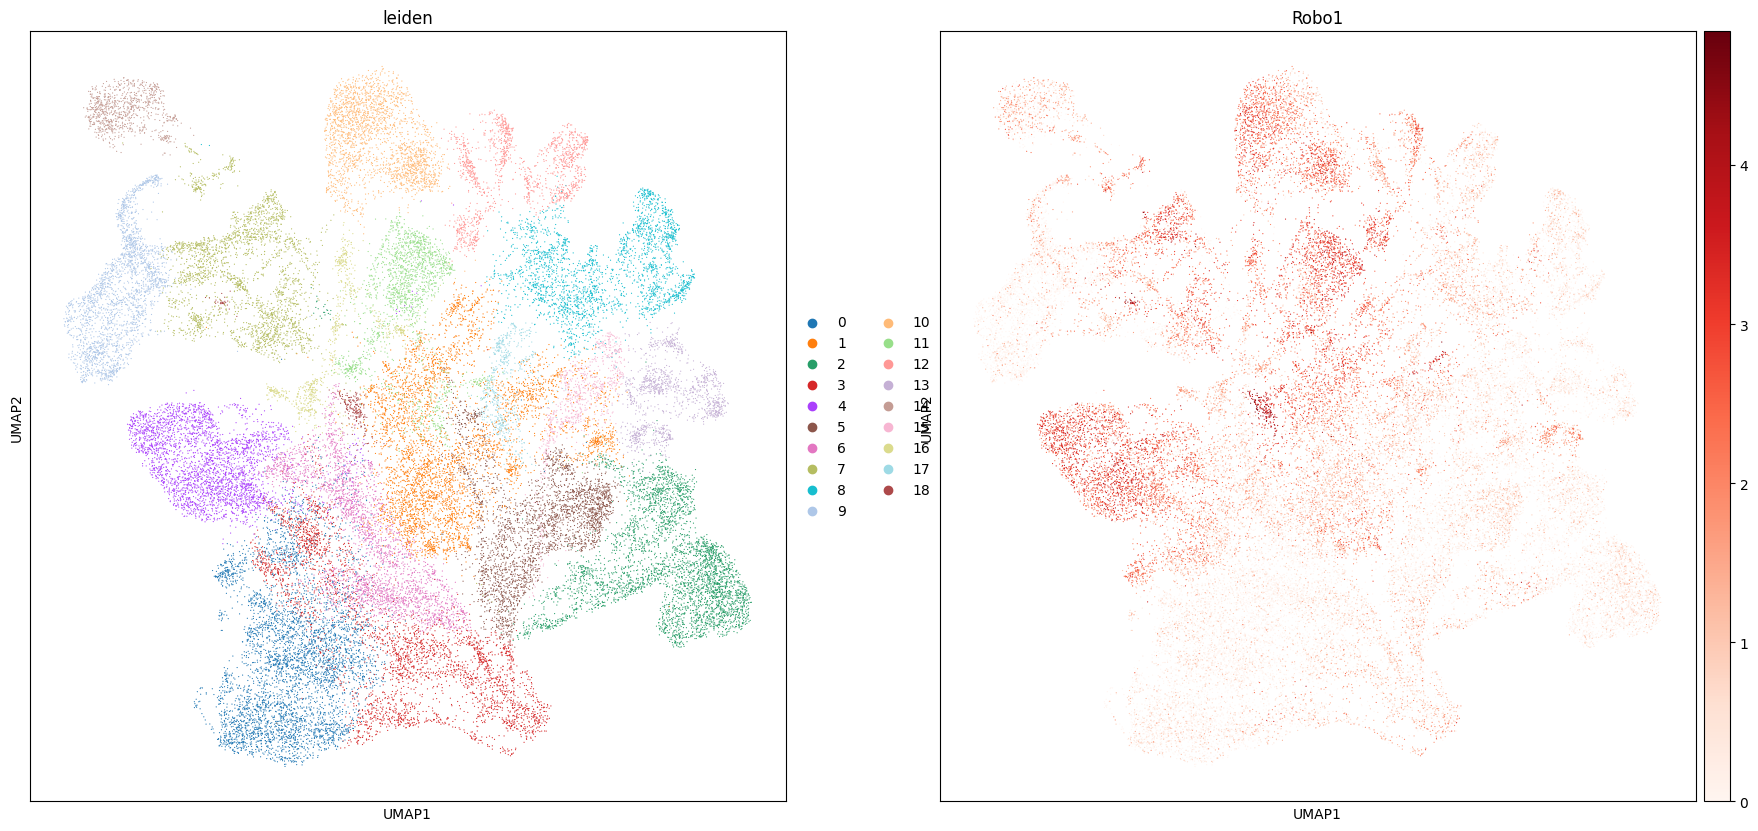

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

FIGSIZE=(10,10)
rcParams['figure.figsize']=FIGSIZE

adata = sc.read_h5ad("F:/Lab/human retina/Fetal Human Retina.h5ad")

sc.pl.umap(adata,color=['leiden','Robo1'], add_outline=False,use_raw=False,cmap='Reds')

In [ ]:
import harmonypy as hm
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, 'development_stage')

adata.obsm['X_pca_harmony'] = ho.Z_corr.T
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata.obs
sc.pl.umap(adata, color=["leiden", "Robo1"],add_outline=True,legend_loc='on data')
#adata.write("F:/Lab/human retina/Fetal Human Retina_integrated.h5ad")

In [21]:
adata = sc.read_h5ad("F:/Lab/human retina/Fetal Human Retina_integrated.h5ad")

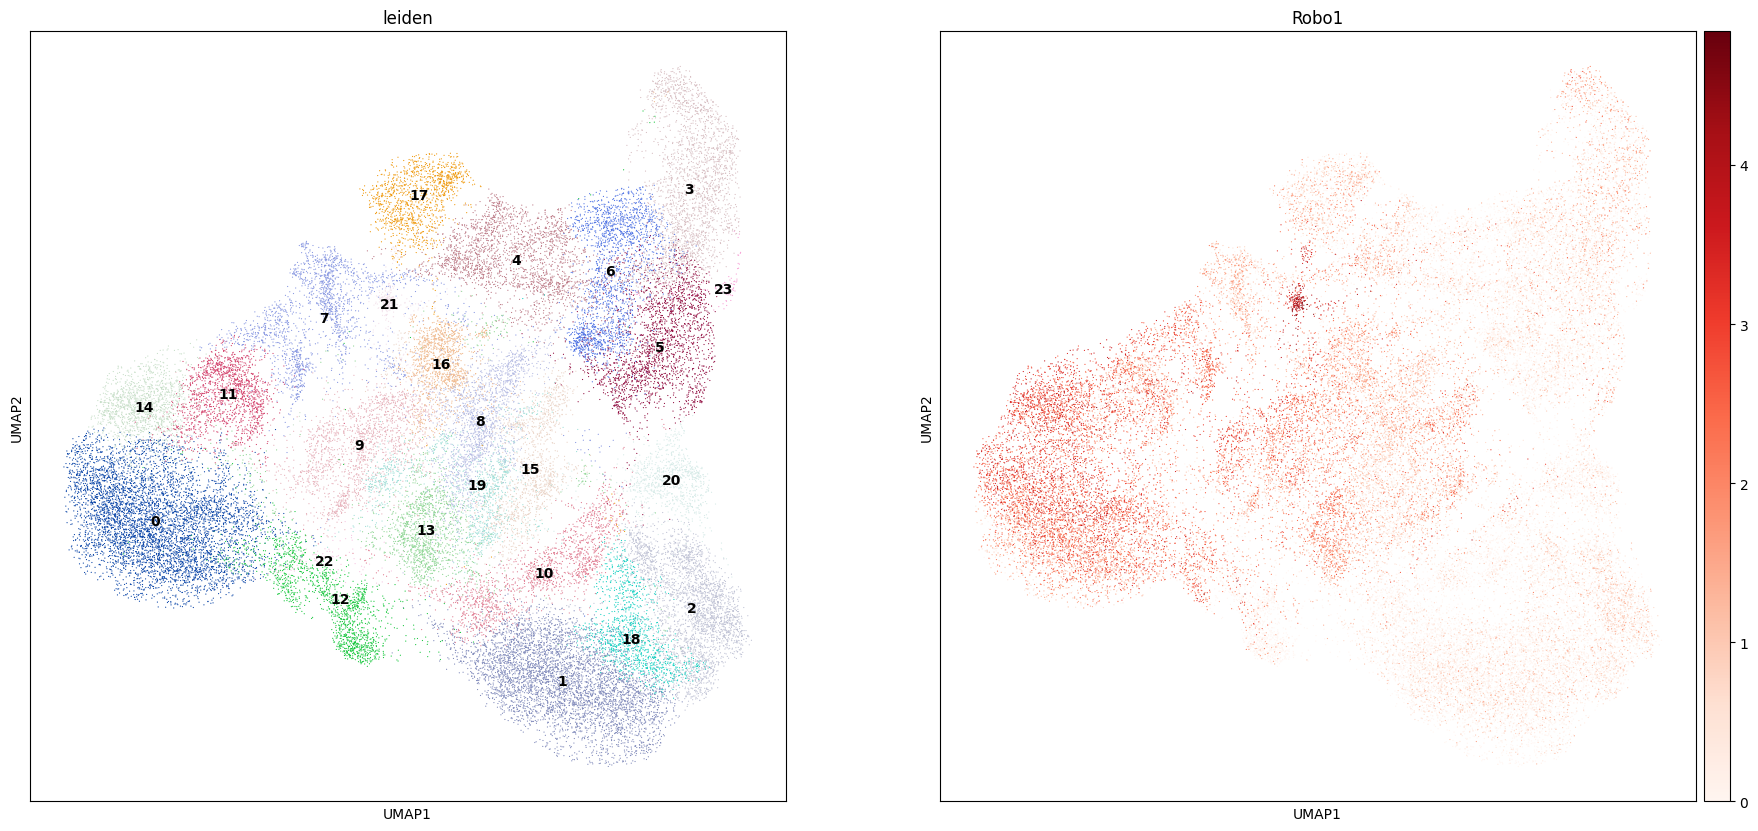

In [30]:
FIGSIZE=(10,10)
rcParams['figure.figsize']=FIGSIZE

sc.pl.umap(adata,color=['leiden','Robo1'], add_outline=False,use_raw=False,cmap='Reds',legend_loc='on data')

In [22]:
marker_genes = ['Bnc2','Nr2f2',
 'Syt6',
 'Igf1',
 'Gucy1a1',
 'Pcdh9',
 'Igfbp5',
 'Pcdh8',
 'Fam163a',
 'Nefl',
 'Mgarp',
 'Gabra5',
 'Crabp1',
 'Slc6a11',
 'Adarb1',
 'Sema6a',
 'Arhgdig',
 'Fstl4',
 "Npy",
 "Igfbp7",
"Pappa",
"Robo1",
"Gpr88",
"Ankrd34c",
"Fibcd1",
"Mmp12",
"Tbx5",
"Ptprk"]

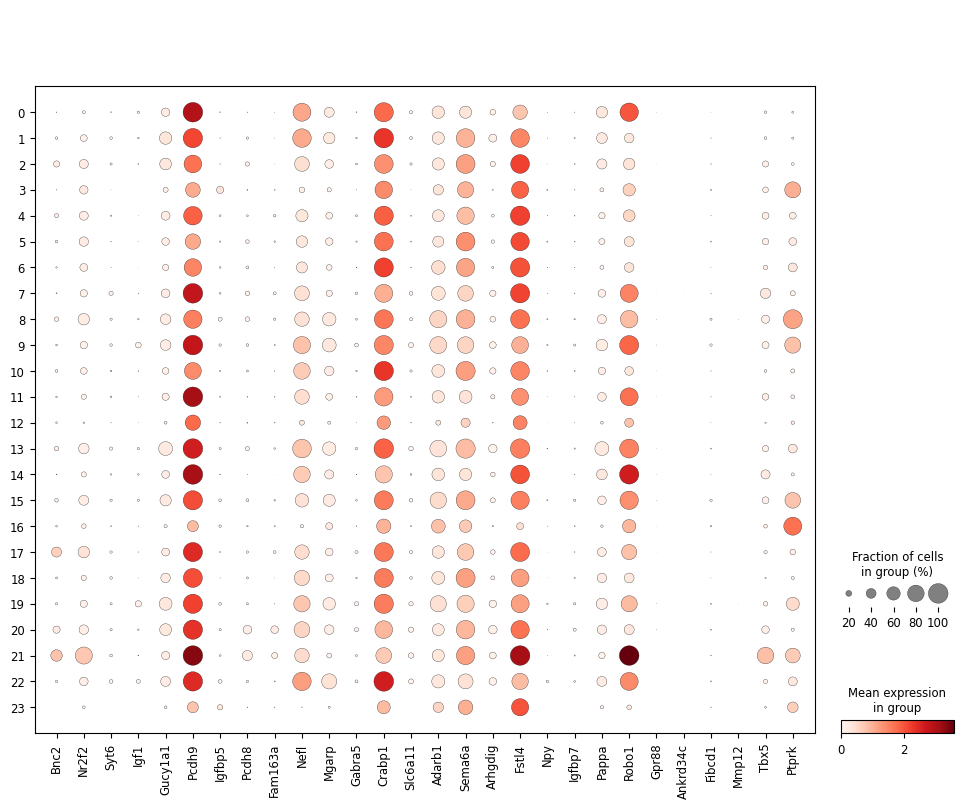

In [23]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

In [351]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

c:\Users\james\mambaforge\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


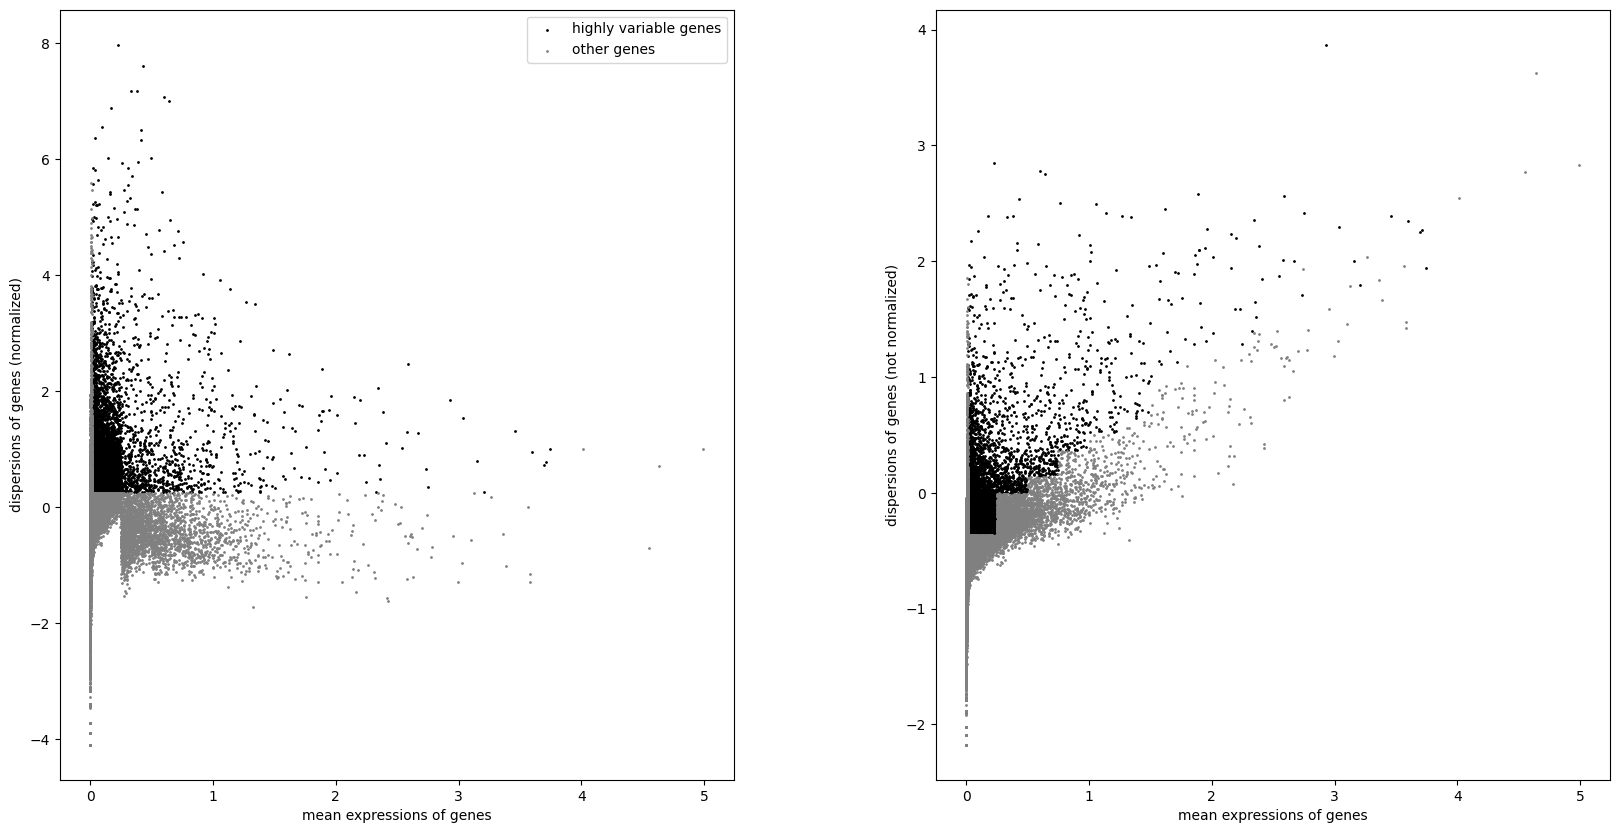

In [352]:
sc.pl.highly_variable_genes(adata,)

In [353]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [ ]:
adata.write("E:/Lab/human retina/Fetal Human Retina.h5ad")

In [321]:
adata.var.index = adata.var['feature_name']

In [355]:
adata.var.index

Index(['Linc01409', 'Ensg00000272438.1', 'Noc2l', 'Agrn', 'C1orf159', 'Dvl1',
       'Mrpl20', 'Atad3a', 'Ssu72', 'Ensg00000272106.1',
       ...
       'Mt-nd2', 'Mt-co1', 'Mt-co2', 'Mt-atp6', 'Mt-co3', 'Mt-nd3', 'Mt-nd4',
       'Mt-nd5', 'Mt-cyb', 'Ensg00000276256.1'],
      dtype='object', length=6556)

In [309]:
adata

View of AnnData object with n_obs × n_vars = 807 × 6556
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'tissue_type', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'subclass', 'majorclass', 'study_name', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'leiden', 'OnOff'
    var: 'feature_is_filtered', 'feature_name', 'f

In [28]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Grik2', 'Tenm3', 'Cdh11'), ('Tafa2', 'Zfhx3', 'Ptprk'),
            ('Pcdh9', 'Asic2', 'Meis2'), ..., ('Asic2', 'Tafa2', 'Megf10'),
            ('Tenm3', 'Tgfb2', 'Rasgef1b'), ('Zfhx3', 'Grik2', 'Reln')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O')]),
 'scores': rec.array([( 12.671558,  13.316626,  7.6857376),
            ( 12.414092,  12.398945,  7.615059 ),
            ( 12.34309 ,  12.3586  ,  7.4349422), ...,
            (-13.153975, -12.09533 , -5.674815 ),
            (-13.718674, -12.304578, -5.7181344),
            (-13.726636, -12.431767, -7.464582 )],
           dtype=[('0', '<f4'), ('1', '<f4'), ('2', '<f4')]),
 'pvals': rec.array([(8.50090706e-37, 1.85296038e-40, 1.52117757e-14),
            (2.19158311e-35, 2.64788075e-35, 2.63570807e-14),
            (5.30788730e-35, 4.37716241e-35, 1.04

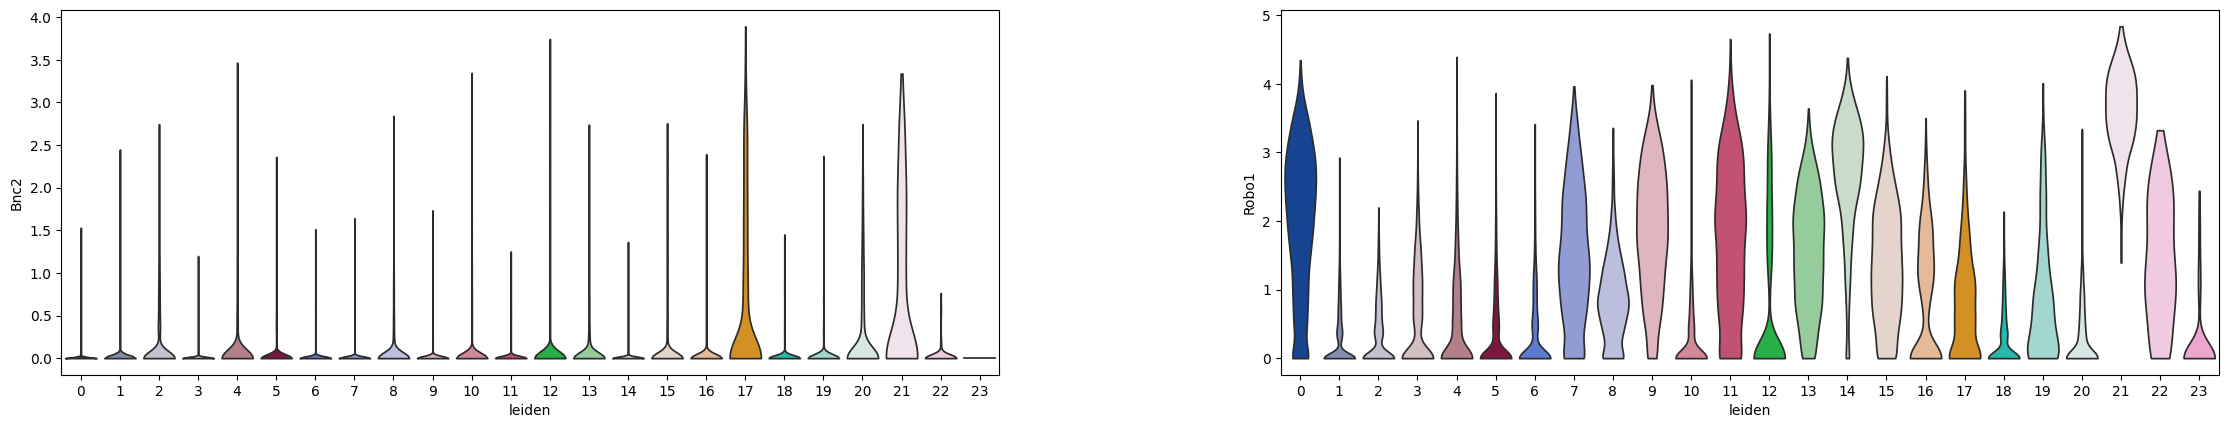

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

FIGSIZE=(10,5)
rcParams['figure.figsize']=FIGSIZE

sc.pl.violin(adata, ['Bnc2','Robo1'], groupby='leiden',size=0)

In [4]:
adata.var.index = adata.var['feature_name']

In [7]:
adata.obs['group'] = 'rest_of_clusters'
adata.obs.loc[adata.obs['leiden'] == '21', 'group'] = 'target_cluster'

c:\Users\james\mambaforge\lib\site-packages\scanpy\tools\_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\james\mambaforge\lib\site-packages\scanpy\tools\_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\james\mambaforge\lib\site-packages\scanpy\tools\_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

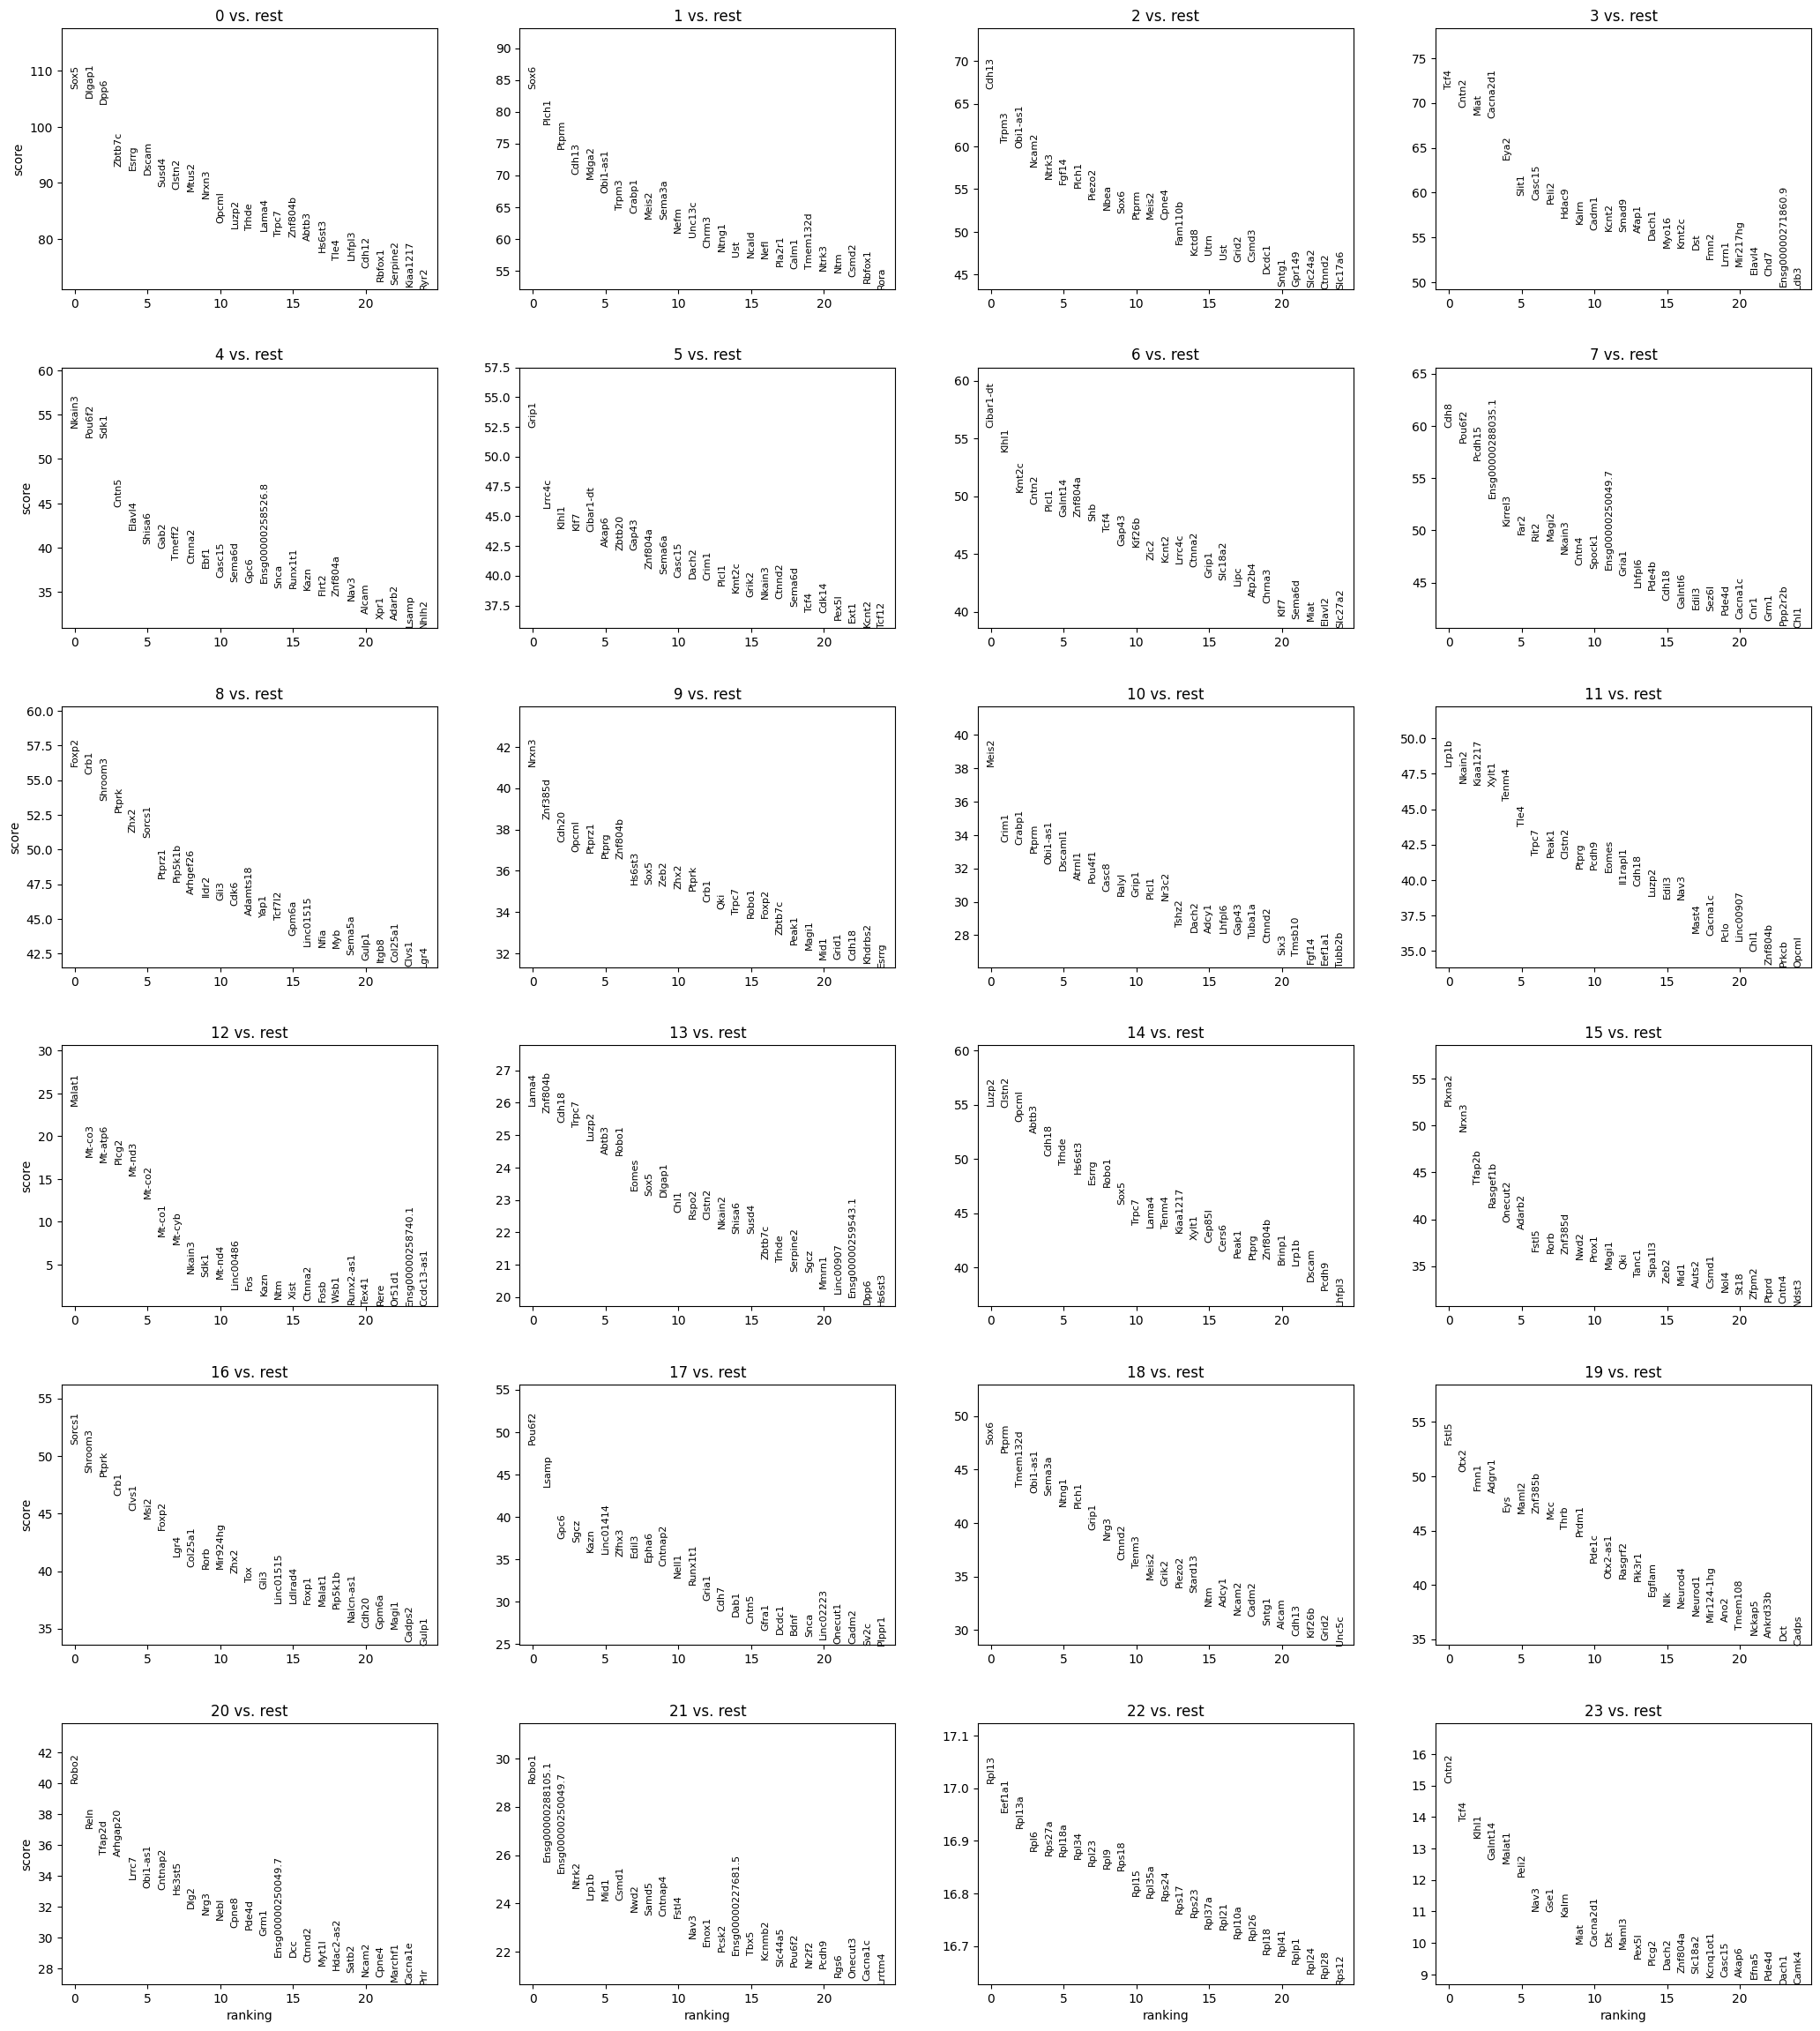

In [20]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

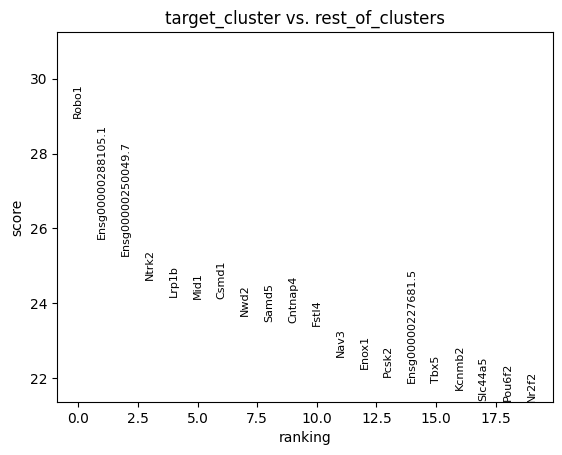

In [8]:
#group1, group2='0','3'
group1, group2='target_cluster','rest_of_clusters'

sc.tl.rank_genes_groups(adata, groupby='group', groups=[group1], reference=group2, method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=[group1], n_genes=20)
#sc.pl.rank_genes_groups_violin(adata_subset, groups=group1, n_genes=20)

In [9]:
d = adata.uns['rank_genes_groups']
vol = pd.DataFrame()
namelist = d['names'].tolist
namelist

<function recarray.tolist>

In [10]:
#DEG rankings
ranked_genes_by_cluster = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
ranked_genes_by_cluster.head(10)

,target_cluster
0,Robo1
1,Ensg00000288105.1
2,Ensg00000250049.7
3,Ntrk2
4,Lrp1b
5,Mid1
6,Csmd1
7,Nwd2
8,Samd5
9,Cntnap4


In [12]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [33]:
degs['neglogpvals'] = np.log10(degs['pvals']) * -1
degs['names'] = degs['names'].str.upper()


In [34]:
marker_genes = ['ROBO1','FSTL4','TBX5','NR2F2','BNC2','ENSG00000288105.1']

In [366]:
gene_names = ['Fezf1']

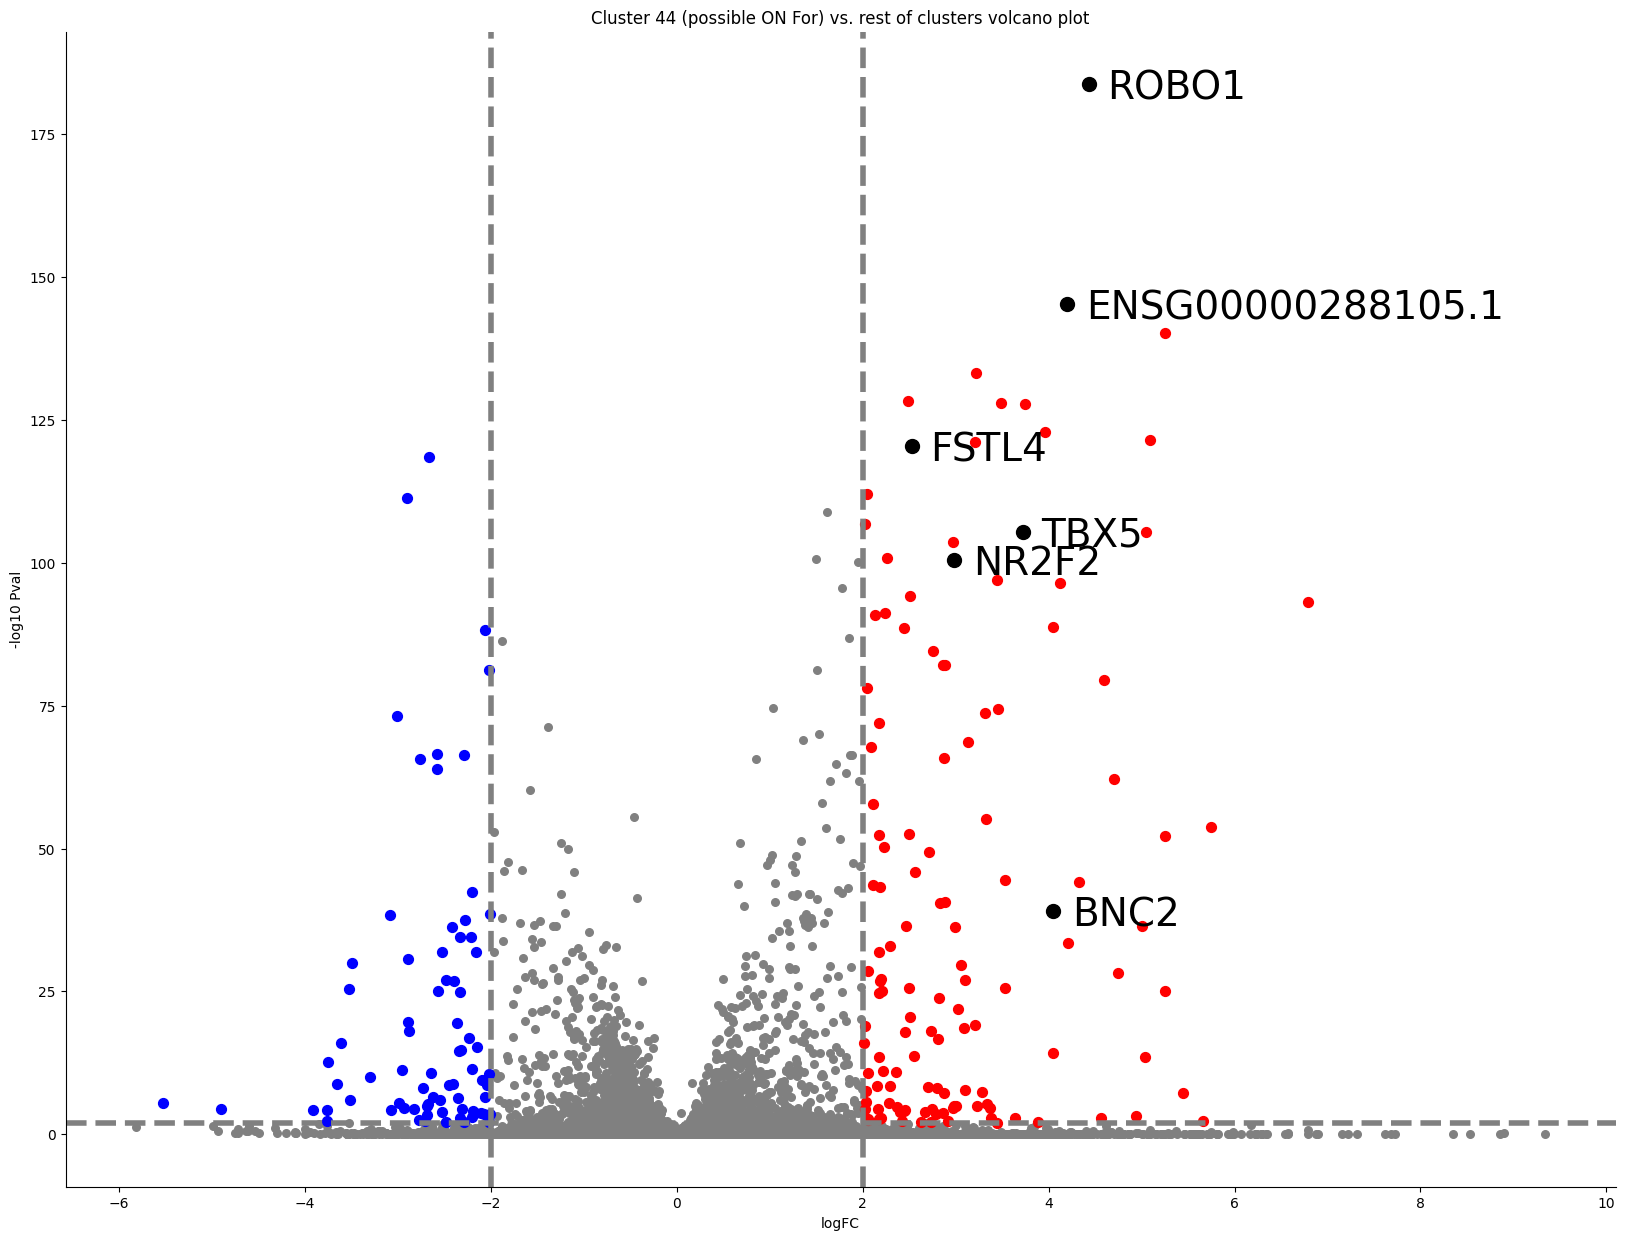

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
FIGSIZE=(1,2)
rcParams['figure.figsize']=FIGSIZE

#unfiltered:
#degsub = degs

#filtered:
degsub = degs[degs['logfoldchanges'] < 10]
degsub = degsub[degsub['logfoldchanges'] > -10]

plt.figure(figsize=(20,15))
plt.scatter(x=degsub['logfoldchanges'],y=degsub['neglogpvals'],s=30,color='grey')
plt.xlabel('logFC')
plt.ylabel('-log10 Pval')

down = degsub[(degsub['logfoldchanges']<=-2)&(degsub['pvals']<=0.01)]
up = degsub[(degsub['logfoldchanges']>=2)&(degsub['pvals']<=0.01)]

plt.scatter(x=down['logfoldchanges'],y=down['pvals'].apply(lambda x:-np.log10(x)),s=50,label="Rest",color="blue")
for i,r in down.iterrows():
    if r['names'] in marker_genes:
        plt.scatter(r['logfoldchanges'], -np.log10(r['pvals']), color="black", s=50)  # Black dot for named genes
        plt.text(x=r['logfoldchanges']+0.2, y=-np.log10(r['pvals'])+0.2, s=r['names'],fontsize = 50)

plt.scatter(x=up['logfoldchanges'],y=up['pvals'].apply(lambda x:-np.log10(x)),s=50,label="44",color="red")
for i,r in up.iterrows():
    if r['names'] in marker_genes:
        plt.scatter(r['logfoldchanges'], -np.log10(r['pvals']), color="black", s=100)  # Black dot for named genes
        plt.text(x=r['logfoldchanges']+ 0.2, y=-np.log10(r['pvals'])-2.5, s=r['names'],fontsize=28)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

plt.axvline(-2,color="grey",linestyle="--",linewidth=4)
plt.axvline(2,color="grey",linestyle="--",linewidth=4)
plt.axhline(2,color="grey",linestyle="--",linewidth=4)
plt.title("Cluster 44 (possible ON For) vs. rest of clusters volcano plot")
#plt.savefig("F:/Lab/Robo1 Figures/SVGs/Robo1_human_volcano_plot.tiff", format="tiff", dpi=1000)
#plt.legend()

In [39]:
marker_genes1 = ['BNC2','TBX5','FSTL4','NR2F2']

marker_genes2 = ['ROBO1',
        'ENSG00000288105.1',
        'ENSG00000250049.7',
        'NTRK2',
        'CNTNAP4',
        'NWD2',
        'SAMD5',
        'CSMD1',
        'MID1']

In [55]:
lst=adata.var_names.tolist()
cap = []
for x in lst:
    cap.append(x.upper())
adata.var_names = cap

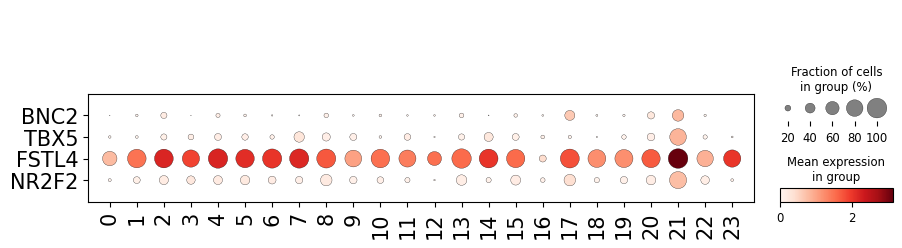

In [75]:
FIGSIZE=(10,15)
rcParams['figure.figsize']=FIGSIZE

fig = sc.pl.dotplot(adata, marker_genes1, groupby='leiden',use_raw=False, swap_axes=True,return_fig=True)
axes = fig.get_axes()
# change fontsize like matplot way
axes['mainplot_ax'].tick_params(axis='x', labelsize=15)
axes['mainplot_ax'].tick_params(axis='y', labelsize=15)
plt.savefig("F:/Lab/Robo1 Figures/SVGs/Robo1_human_odsgc dotplot.tiff", format="tiff", dpi=1000,bbox_inches="tight")

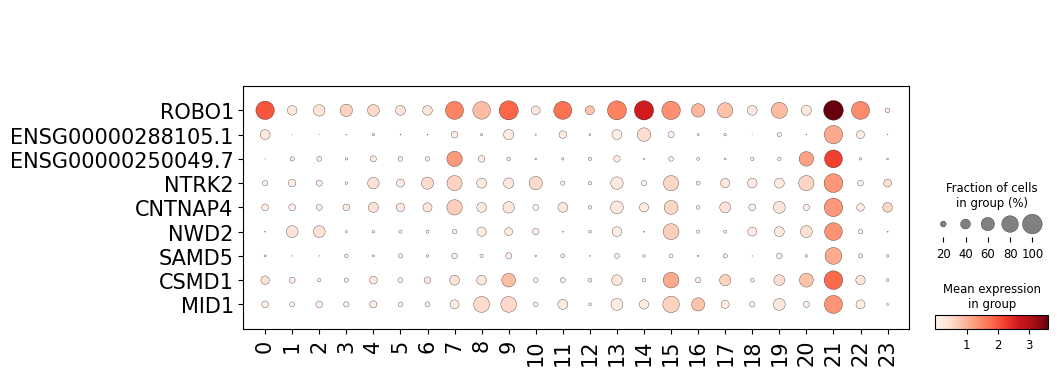

In [ ]:
FIGSIZE=(10,15)
rcParams['figure.figsize']=FIGSIZE

fig = sc.pl.dotplot(adata, marker_genes2, groupby='leiden',use_raw=False, swap_axes=True,return_fig=True)
axes = fig.get_axes()
# change fontsize like matplot way
axes['mainplot_ax'].tick_params(axis='x', labelsize=15)
axes['mainplot_ax'].tick_params(axis='y', labelsize=15)

#plt.savefig("F:/Lab/Robo1 Figures/SVGs/Robo1_human_c21 dotplot.tiff", format="tiff", dpi=1000,bbox_inches="tight")